In [1]:
import numpy as np
import pylab as pl

### Simulation parameter:
$D_{in}$: Cylinder unrestricted diffusivity<br>
$R$: Cylinder radius<br>
$D_{\parallel}$: Hindered parallel diffusivity<br>
$D_{\perp}$: Hindered perpendicular diffusivity<br>
$f_{in}$: Cylinder compartement volume fraction<br>
$f_{csf}$: CSF compartement volume fraction

implicit parameter:<br>
$D_{csf}$: CSF diffusivity<br>
$f_{hind}$: Hindered compartement volume fraction

### Parameters Range:
$D_{in} \in [1, 3] \times 10^{-9} m^2/s$<br>
$R \in [0.1, 5] \times 10^{-6} m$<br>
$D_{\parallel} \in [1, 3] \times 10^{-9} m^2/s$<br>
$D_{\perp} \in [0.1, 2] \times 10^{-9} m^2/s$<br>
$f_{in} \in [0, 1]$<br>
$f_{csf} \in [0, 1]$

with:<br>
$D_{\perp} < D_{\parallel}$<br>
$f_{in} + f_{csf} \le 1$

and:<br>
$D_{csf} = 3.1 \times 10^{-9} m^2/s$<br>
$f_{hind} = 1 - (f_{in} + f_{csf})$

### Acquisition parameter:
Same as Alfred and Assaf ISMRM abstract<br>
86 directions over 5 shell times 3 ($\Delta, \delta$):<br>
$b \in [500, 1000, 2000, 3000, 4000, 5000]\,s/mm^2$<bv>
$(\Delta, \delta, G_{\max}) = (16, 9, 259), (28, 7, 240), (40, 6, 230) \,(ms, ms, mT/m)$

In [3]:
# load simulation parameter
params = np.load('data/TheParam.npy')
todel = np.load('data/todel.npy')
todel = np.array(todel).astype(np.bool)

In [4]:
params.shape

(3024450, 6)

In [5]:
todel.sum()

2066786

In [6]:
# filtering duplicate (ex: cases where fin = 0 and we are varying Din)
params = params[todel]

In [7]:
params.shape

(2066786, 6)

In [8]:
# load fitted AxCaliber3D param
frac_rest = np.load('data/fR.npy')[todel]
frac_hind = np.load('data/fH.npy')[todel]
frac_csf = np.load('data/fCSF.npy')[todel]
beta1 = np.load('data/beta1.npy')[todel]
beta2 = np.load('data/beta2.npy')[todel]
mean_rad = np.load('data/mean_rad.npy')[todel]
residuals = np.load('data/res_map.npy')[todel]
nmse = np.load('data/nmse_map.npy')[todel]
total_frac = np.load('data/total_frac.npy')[todel]

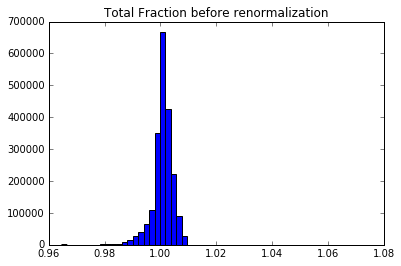

In [9]:
# quick look at the distribution
_ = pl.hist(total_frac, bins=50)
_ = pl.title('Total Fraction before renormalization')

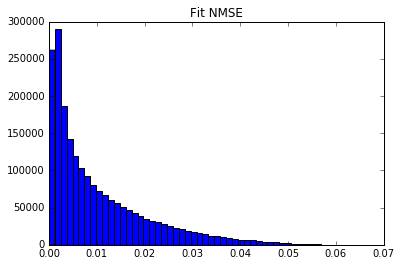

In [10]:
_ = pl.hist(nmse, bins=50)
_ = pl.title('Fit NMSE')

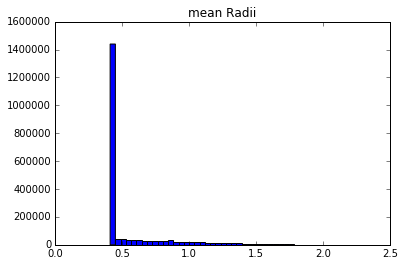

In [11]:
_ = pl.hist(mean_rad, bins=50)
_ = pl.title('mean Radii')

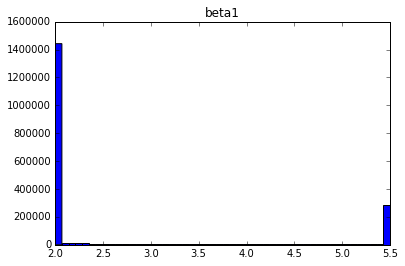

In [12]:
_ = pl.hist(beta1, bins=50)
_ = pl.title('beta1')

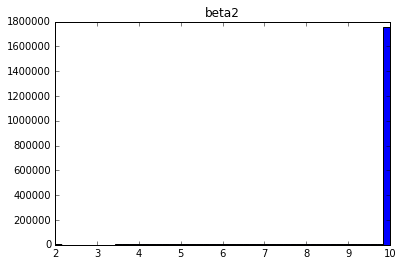

In [13]:
_ = pl.hist(beta2, bins=50)
_ = pl.title('beta2')

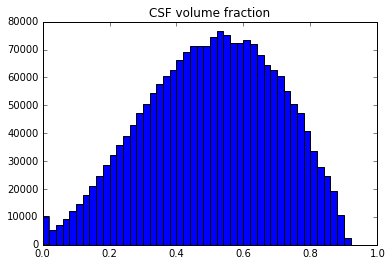

In [14]:
_ = pl.hist(frac_csf, bins=50)
_ = pl.title('CSF volume fraction')

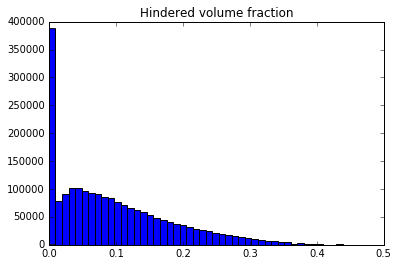

In [15]:
_ = pl.hist(frac_hind, bins=50)
_ = pl.title('Hindered volume fraction')

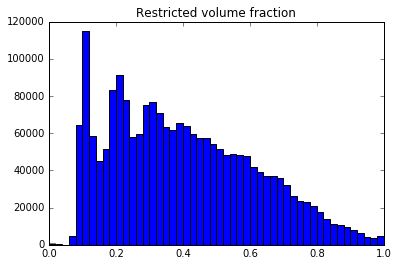

In [16]:
_ = pl.hist(frac_rest, bins=50)
_ = pl.title('Restricted volume fraction')

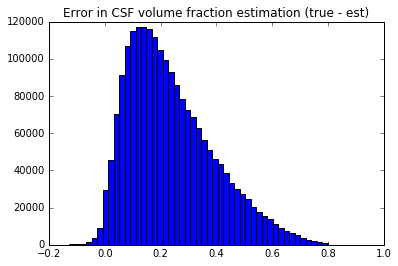

In [17]:
frac_csf_sim = params[:, 5]
frac_csf_err = frac_csf - frac_csf_sim 
_ = pl.hist(frac_csf_err, bins=50)
_ = pl.title('Error in CSF volume fraction estimation (true - est)')

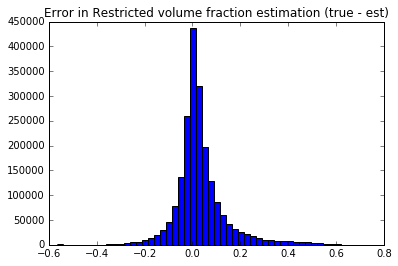

In [18]:
frac_rest_sim = params[:, 4]
frac_rest_err = frac_rest - frac_rest_sim 
_ = pl.hist(frac_rest_err, bins=50)
_ = pl.title('Error in Restricted volume fraction estimation (true - est)')

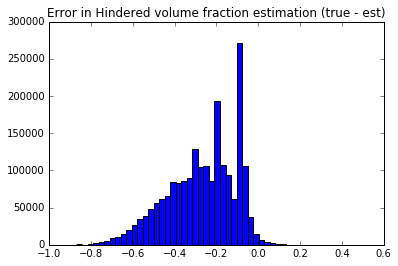

In [19]:
frac_hind_sim = 1 - (params[:, 4]+params[:, 5])
frac_hind_err = frac_hind - frac_hind_sim 
_ = pl.hist(frac_hind_err, bins=50)
_ = pl.title('Error in Hindered volume fraction estimation (true - est)')

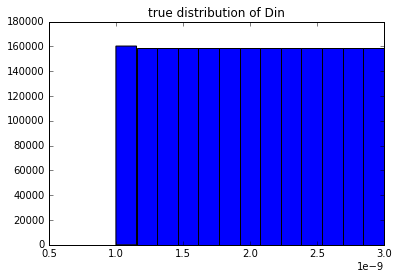

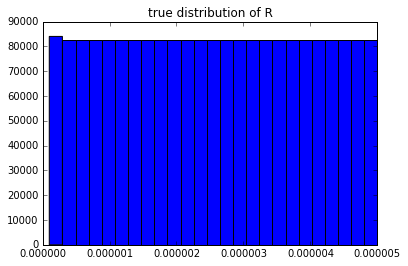

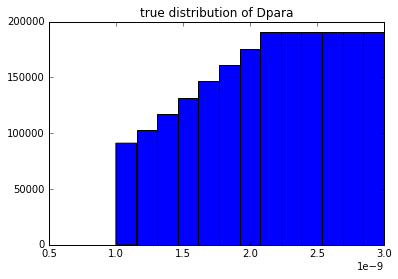

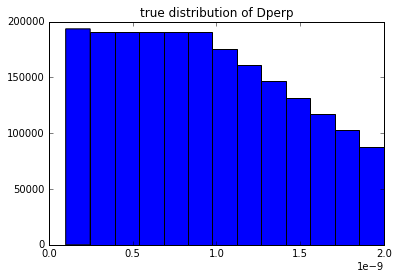

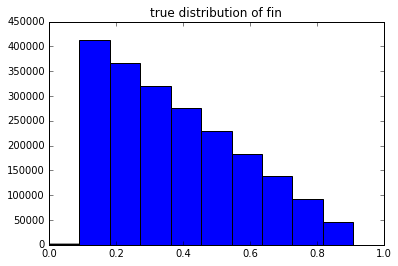

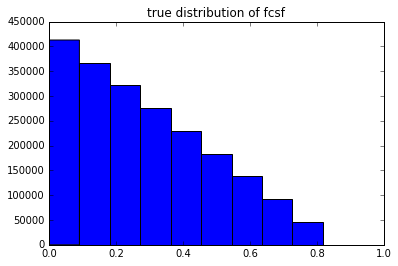

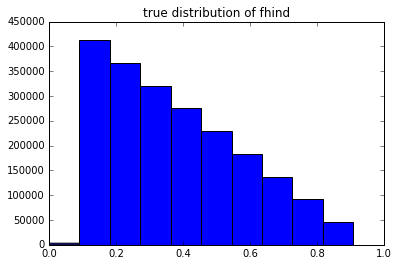

In [32]:
# True Parameters distribution
param_name = ['Din', 'R', 'Dpara', 'Dperp', 'fin', 'fcsf']
for i in range(6):
    pl.figure()
    _ = pl.hist(params[:,i], bins=len(set(params[:,i])))
    _ = pl.title('true distribution of {}'.format(param_name[i]))
pl.figure()
_ = pl.hist(1-(params[:,4]+params[:,5]), bins=len(set(params[:,i])))
_ = pl.title('true distribution of {}'.format('fhind'))

In [20]:
from scipy.stats.stats import pearsonr

In [35]:
# correlation between true fraction and estimation
print('csf', pearsonr(frac_csf, frac_csf_sim)[0])
print('hind', pearsonr(frac_hind, frac_hind_sim)[0])
print('rest', pearsonr(frac_rest, frac_rest_sim)[0])

('csf', 0.7325320144289791)
('hind', 0.7895025900465557)
('rest', 0.8766879824700003)


In [36]:
# correlation between absolute fraction error and model NMSE
print('csf', pearsonr(np.abs(frac_csf_err), nmse)[0])
print('hind', pearsonr(np.abs(frac_hind_err), nmse)[0])
print('rest', pearsonr(np.abs(frac_rest_err), nmse)[0])

('csf', 0.14067907775119462)
('hind', -0.0037686586540942933)
('rest', 0.19710019402832718)


In [37]:
# correlation between error of different fraction
print('csf/hind', pearsonr(frac_csf_err, frac_hind_err))
print('csf/rest', pearsonr(frac_csf_err, frac_rest_err))
print('hind/rest', pearsonr(frac_hind_err, frac_rest_err))

('csf/hind', (-0.7676129377842059, 0.0))
('csf/rest', (-0.27703419900084697, 0.0))
('hind/rest', (-0.4031733452727957, 0.0))


In [110]:
def plot_2dhist(datax, datay, nbins=10):
    heatmap, xedges, yedges = np.histogram2d(datax, datay, bins=nbins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    pl.imshow(heatmap.T, extent=extent, origin='lower', interpolation='bicubic')
    #pl.imshow(heatmap.T, origin='lower', interpolation='bicubic')
    pl.show()

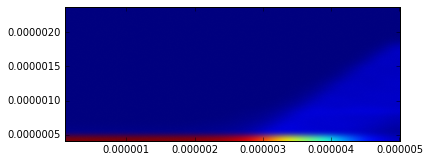

In [111]:
# Radii vs fitted mean_rad
plot_2dhist(params[:,1], mean_rad*1e-6, nbins=len(set(params[:,1])))

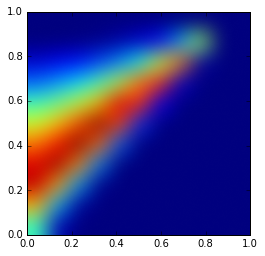

In [112]:
plot_2dhist(params[:,5], frac_csf, nbins=len(set(params[:,5])))

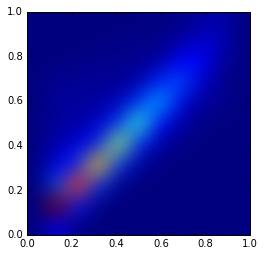

In [113]:
plot_2dhist(params[:,4], frac_rest, nbins=len(set(params[:,4])))

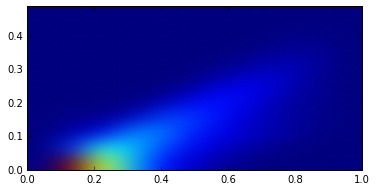

In [114]:
plot_2dhist(1-(params[:,4]+params[:,5]), frac_hind, nbins=len(set(params[:,4])))

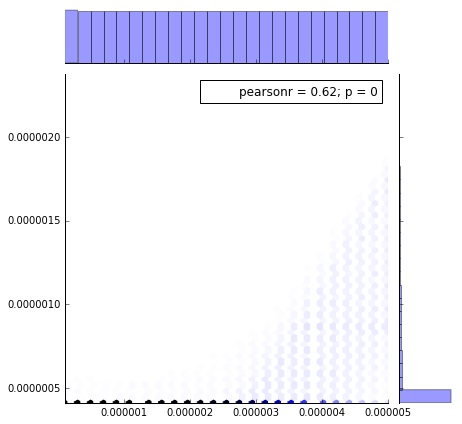

In [122]:
import seaborn as sns
sns.jointplot(x=params[:,1], y=mean_rad*1e-6, kind='hex', marginal_kws=dict(bins=len(set(params[:,1]))))

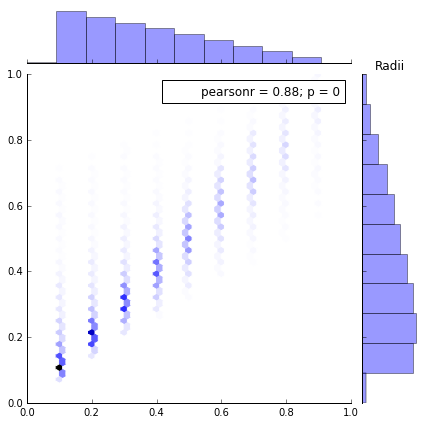

In [121]:
sns.jointplot(x=params[:,4], y=frac_rest, kind='hex', marginal_kws=dict(bins=len(set(params[:,4]))))
pl.title('Radii')
pl.show()